# **CS 6120: Natural Language Processing - Prof. Ahmad Uzair** 

### **Assignment 3: n-gram Language Models, Word Sense disambiguation(LSA using SVD), LSTM**

### **Total points: 100**


# Q1. Latent Semantic Analysis (35 Points) 


 - A. Singular Value Decomposition (SVD) based distributed representation of text and documents. You can use python libraries for matrix decomposition (scipy). To demonstrate your work, use the example dataset (Table 2) of "R. A. Harshman (1990). Indexing by latent semantic analysis. Journal of the American society for information science". (10 Points)

 - B. Visualize (2-D) the documents and terms using library of your choice. (10 Points)

 - C. Implement a function that converts a query string to distributed representation and retrieves relevent documents. Visualize the the results as shown in Fig 1 of the paper. (10 Points)

## <CENTER>Task-1 (10 Points)

### Input data

In [1]:
#Dataset
c1 = 'Computer vision is a field of artificial intelligence that focuses on enabling computers to interpret and understand visual information from the world.'
c2 = 'One of the most prominent applications of computer vision is in autonomous vehicles, where it helps the vehicle "see" and make decisions based on its surroundings.'
c3 = 'Computer vision is also used in facial recognition technology, which has become controversial due to concerns over privacy and potential misuse.'
c4 = 'In the medical field, computer vision is used to assist doctors in diagnosing diseases and analyzing medical images such as x-rays and MRIs.'
c5 = 'Computer vision is also used in security and surveillance systems, where it can detect and recognize suspicious activities or individuals.'
m1 = 'Cybersecurity refers to the practices and technologies used to protect computer systems, networks, and data from unauthorized access, use, disclosure, disruption, modification, or destruction.'
m2 = 'One of the most important applications of cybersecurity is in safeguarding sensitive data and personal information, such as financial data or healthcare records.'
m3 = 'Cybersecurity is also essential in protecting critical infrastructure, such as power grids and transportation systems, from cyber attacks that could cause significant disruptions.'
m4 = 'In the healthcare industry, cybersecurity is used to protect medical devices and prevent unauthorized access to patient data.'
documents = [c1, c2, c3, c4, c5, m1, m2, m3, m4]

### Perform preprocessing of documents

In the below cell remove punctuations and lowercase the message

In [2]:
import string
import nltk
string.punctuation
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

def removePunctuation(text):
    return "".join([char for char in text if char not in string.punctuation])

def preprocess(message):
    '''
    Input:
        message: a string containing a message.
    Output:
        preprocessed_message_list: a list of words containing the processed message. 

    '''
    lowerCaseMessage = message.lower()
    removePunc = removePunctuation(lowerCaseMessage)
    preprocessed_message_list = word_tokenize(removePunc)
    return preprocessed_message_list

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sgheb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Verify preprocessed data

In [3]:
for sent in documents:
    print(preprocess(sent))

['computer', 'vision', 'is', 'a', 'field', 'of', 'artificial', 'intelligence', 'that', 'focuses', 'on', 'enabling', 'computers', 'to', 'interpret', 'and', 'understand', 'visual', 'information', 'from', 'the', 'world']
['one', 'of', 'the', 'most', 'prominent', 'applications', 'of', 'computer', 'vision', 'is', 'in', 'autonomous', 'vehicles', 'where', 'it', 'helps', 'the', 'vehicle', 'see', 'and', 'make', 'decisions', 'based', 'on', 'its', 'surroundings']
['computer', 'vision', 'is', 'also', 'used', 'in', 'facial', 'recognition', 'technology', 'which', 'has', 'become', 'controversial', 'due', 'to', 'concerns', 'over', 'privacy', 'and', 'potential', 'misuse']
['in', 'the', 'medical', 'field', 'computer', 'vision', 'is', 'used', 'to', 'assist', 'doctors', 'in', 'diagnosing', 'diseases', 'and', 'analyzing', 'medical', 'images', 'such', 'as', 'xrays', 'and', 'mris']
['computer', 'vision', 'is', 'also', 'used', 'in', 'security', 'and', 'surveillance', 'systems', 'where', 'it', 'can', 'detect',

##### Expected Output
```CPP
['computer', 'vision', 'is', 'a', 'field', 'of', 'artificial', 'intelligence', 'that', 'focuses', 'on', 'enabling', 'computers', 'to', 'interpret', 'and', 'understand', 'visual', 'information', 'from', 'the', 'world']
['one', 'of', 'the', 'most', 'prominent', 'applications', 'of', 'computer', 'vision', 'is', 'in', 'autonomous', 'vehicles', 'where', 'it', 'helps', 'the', 'vehicle', '"see"', 'and', 'make', 'decisions', 'based', 'on', 'its', 'surroundings']
['computer', 'vision', 'is', 'also', 'used', 'in', 'facial', 'recognition', 'technology', 'which', 'has', 'become', 'controversial', 'due', 'to', 'concerns', 'over', 'privacy', 'and', 'potential', 'misuse']
['in', 'the', 'medical', 'field', 'computer', 'vision', 'is', 'used', 'to', 'assist', 'doctors', 'in', 'diagnosing', 'diseases', 'and', 'analyzing', 'medical', 'images', 'such', 'as', 'x', 'rays', 'and', 'MRIs']
['computer', 'vision', 'is', 'also', 'used', 'in', 'security', 'and', 'surveillance', 'systems', 'where', 'it', 'can', 'detect', 'and', 'recognize', 'suspicious', 'activities', 'or', 'individuals']
['Cybersecurity', 'refers', 'to', 'the', 'practices', 'and', 'technologies', 'used', 'to', 'protect', 'computer', 'systems', 'networks', 'and', 'data', 'from', 'unauthorized', 'access', 'use', 'disclosure', 'disruption', 'modification', 'or', 'destruction']
['one', 'of', 'the', 'most', 'important', 'applications', 'of', 'cybersecurity', 'is', 'in', 'safeguarding', 'sensitive', 'data', 'and', 'personal', 'information', 'such', 'as', 'financial', 'data', 'or', 'healthcare', 'records']
['Cybersecurity', 'is', 'also', 'essential', 'in', 'protecting', 'critical', 'infrastructure', 'such', 'as', 'power', 'grids', 'and', 'transportation', 'systems', 'from', 'cyber', 'attacks', 'that', 'could', 'cause', 'significant', 'disruptions']
['in', 'the', 'healthcare', 'industry', 'cybersecurity', 'is', 'used', 'to', 'protect', 'medical', 'devices', 'and', 'prevent', 'unauthorized', 'access', 'to', 'patient', 'data']
```

### Assign names to document names
In the below cell create a list of document names. It will be later used to visualize documents

In [4]:
def createDocName(documents):
    '''
    Input:
        documents: list of documents.
    Output:
        doc_names: a list of document names. 

    '''
    doc_names = []
    counterc = 1
    counterm = 1
    for doc in documents:
        if (counterc <= 5):
            name = "c" + str(counterc)
            counterc = counterc + 1
            doc_names.append(name)
        else:
            name = "m" + str(counterm)
            counterm = counterm + 1
            doc_names.append(name)
    return doc_names

In [5]:
docName = createDocName(documents)
print(docName)

['c1', 'c2', 'c3', 'c4', 'c5', 'm1', 'm2', 'm3', 'm4']


##### Expected Output
``` CPP
['c1', 'c2', 'c3', 'c4', 'c5', 'm1', 'm2', 'm3', 'm4']
```

### Words to Index mapping
Retrieve words from documents and create map of word and associate index to it

In [6]:
import re
import nltk
from nltk.corpus import stopwords

stopword = nltk.corpus.stopwords.words('english')

def removeStopwords(text):
    return " ".join([word for word in re.split('\W+', text)
        if word not in stopword])

def build_word_to_ix(documents, stopwords=stopword):
    '''
    Input:
        documents: list of documents
        stopwords: list of stopwords
    Output:
        doc_names: map of words and assoicated index. Make sure to remove words which occur in less than 2 documents 

    '''
    word_list = []
    word_to_ix = {}

    for doc in documents:
        lowerCase = doc.lower()
        removeStop = removeStopwords(lowerCase)
        processed_doc = preprocess(removeStop)
        for word in processed_doc:
            word_list.append(word)

    word_list = set(word_list)
    for word in word_list:
        count = 0
        for doc in documents:
            lowerCase = doc.lower()
            removeStop = removeStopwords(lowerCase)
            processed_doc = preprocess(removeStop)
            if word in processed_doc:
                count += 1
                word_to_ix[word] = count
            
    for key in word_to_ix.copy():
        if (word_to_ix[key]) < 2:
            del word_to_ix[key]
            
    index = 0
    for k, v in word_to_ix.items():
        word_to_ix[k] = index
        index = index + 1
    return word_to_ix

In [7]:
word_to_ix = build_word_to_ix(documents, stopwords)
print(word_to_ix)

{'applications': 0, 'healthcare': 1, 'unauthorized': 2, 'data': 3, 'one': 4, 'cybersecurity': 5, 'protect': 6, 'also': 7, 'medical': 8, 'field': 9, 'access': 10, 'vision': 11, 'used': 12, 'computer': 13, 'information': 14, 'systems': 15}


##### Expected Output
Note: the index value for each token could be different in your implementation 
```CPP
{'field': 0, 'vision': 1, 'information': 2, 'computer': 3, 'one': 4, 'applications': 5, 'also': 6, 'used': 7, 'medical': 8, 'systems': 9, 'data': 10, 'unauthorized': 11, 'access': 12, 'cybersecurity': 13, 'protect': 14, 'healthcare': 15}
```

### Document-Terms count matrix

In [8]:
import numpy as np
from numpy import array

def build_td_matrix(documents, word_to_ix):
    '''
    Input:
        documents: list of documents.
        word_to_ix: {word, index} map
    Output:
        td_matrix: matrix of count of words in documents, each row 
            represent a word and each column represent a document

    '''
    td_matrix=[]
    rows, cols = len(word_to_ix), len(documents)
    for k, v in word_to_ix.items():
        wordCount = 0
        col = []
        for doc in documents:
            wordCount = 0
            lowerCase = doc.lower()
            removeStop = removeStopwords(lowerCase)
            processed_doc = preprocess(removeStop)
            for word in processed_doc:
                if word != k:
                    continue
                else:
                    wordCount += 1
            col.append(wordCount)
        td_matrix.append(col)
    td_matrix = array(td_matrix)
    return td_matrix

In [9]:
X = build_td_matrix(documents, word_to_ix)
print(X)

[[0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 1 2 0 1]
 [0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 1 0 0 1]
 [0 0 1 0 1 0 0 1 0]
 [0 0 0 2 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 1]
 [1 1 1 1 1 0 0 0 0]
 [0 0 1 1 1 1 0 0 1]
 [1 1 1 1 1 1 0 0 0]
 [1 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 1 0 1 0]]


##### Expected Output
Note: the order of rows could be different in your implementation as it is based on the indexing of the tokens done in build_word_to_ix
```CPP
[[1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0. 1.]
 [0. 0. 0. 2. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 2. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1.]]
 ```

### Singular Value Decomposition
Perform singular value decomposition of count matrix into term singular vector matrix, singular value matrix and document singular vector matrix
- To perform the singular value decompostion please check tutorial:
https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

In [10]:
from scipy import linalg

def svd(documents, word_to_ix, rank):
    '''
    Input:
        documents: list of documents.
        word_to_ix: {word, index} map
        rank: number of colums/rows to retain in decomposed matrix
    Output:
        Uk: term singular vector matrix
        Sk: singular value matrix
        Vk_t: transpose of document singular vector matrix
    '''
    U, S, V = np.linalg.svd(X)
    Uk = U[:, 0:rank]
    Sk = np.diag(S[0:rank])
    Vk = V[:rank, :]
    Vk_t = np.transpose(Vk)
    return Uk, Sk, Vk_t

In [11]:
Uk, Sk, Vk_t = svd(documents, word_to_ix, 2)
print(Uk)
print(Sk)
print(Vk_t)

[[-0.11406442 -0.09695837]
 [-0.16957527 -0.26134991]
 [-0.20656126 -0.17503165]
 [-0.34760786 -0.47741341]
 [-0.11406442 -0.09695837]
 [-0.3086385  -0.33652293]
 [-0.20656126 -0.17503165]
 [-0.1610913   0.18784146]
 [-0.26503675  0.13251736]
 [-0.12717294  0.20278638]
 [-0.20656126 -0.17503165]
 [-0.30025142  0.45516076]
 [-0.41909101  0.14444841]
 [-0.40776071  0.39028813]
 [-0.11470385 -0.06974269]
 [-0.20868502  0.02493571]]
[[4.63682644 0.        ]
 [0.         3.4660758 ]]
[[-0.20485755  0.28230559]
 [-0.2018926   0.18797401]
 [-0.27781813  0.33979025]
 [-0.3848213   0.42056737]
 [-0.32282413  0.34698447]
 [-0.49850192 -0.22485343]
 [-0.3270043  -0.52403905]
 [-0.14631016 -0.03570198]
 [-0.4592868  -0.38181953]]


##### Expected Output
Note: the order of rows could be different in your implementation as it is based on the indexing of the tokens done in build_word_to_ix
```CPP 
[[-0.12717294  0.20278638]
 [-0.30025142  0.45516076]
 [-0.11470385 -0.06974269]
 [-0.40776071  0.39028813]
 [-0.11406442 -0.09695837]
 [-0.11406442 -0.09695837]
 [-0.1610913   0.18784146]
 [-0.41909101  0.14444841]
 [-0.26503675  0.13251736]
 [-0.20868502  0.02493571]
 [-0.34760786 -0.47741341]
 [-0.20656126 -0.17503165]
 [-0.20656126 -0.17503165]
 [-0.3086385  -0.33652293]
 [-0.20656126 -0.17503165]
 [-0.16957527 -0.26134991]]
[[4.63682644 0.        ]
 [0.         3.4660758 ]]
[[-0.20485755  0.28230559]
 [-0.2018926   0.18797401]
 [-0.27781813  0.33979025]
 [-0.3848213   0.42056737]
 [-0.32282413  0.34698447]
 [-0.49850192 -0.22485343]
 [-0.3270043  -0.52403905]
 [-0.14631016 -0.03570198]
 [-0.4592868  -0.38181953]]
 ```

## <CENTER>Task-2 (10 Points)

### Visualize documents in 2D space

In [12]:
#Visualize documents and print coordinates
latent_docs = np.dot(Vk_t, Sk)
latent_docs

array([[-0.94988891,  0.97849257],
       [-0.93614095,  0.65153215],
       [-1.28819443,  1.17773875],
       [-1.78434956,  1.4577184 ],
       [-1.49687945,  1.20267446],
       [-2.31146688, -0.77935904],
       [-1.51626218, -1.81635909],
       [-0.67841483, -0.12374577],
       [-2.12963317, -1.32341543]])

##### Expected
```CPP
[[-0.94988891  0.97849257]
 [-0.93614095  0.65153215]
 [-1.28819443  1.17773875]
 [-1.78434956  1.4577184 ]
 [-1.49687945  1.20267446]
 [-2.31146688 -0.77935904]
 [-1.51626218 -1.81635909]
 [-0.67841483 -0.12374577]
 [-2.12963317 -1.32341543]]
```
![image.png](attachment:9df44069-ca33-481c-856c-0ca163d59c10.png)

6

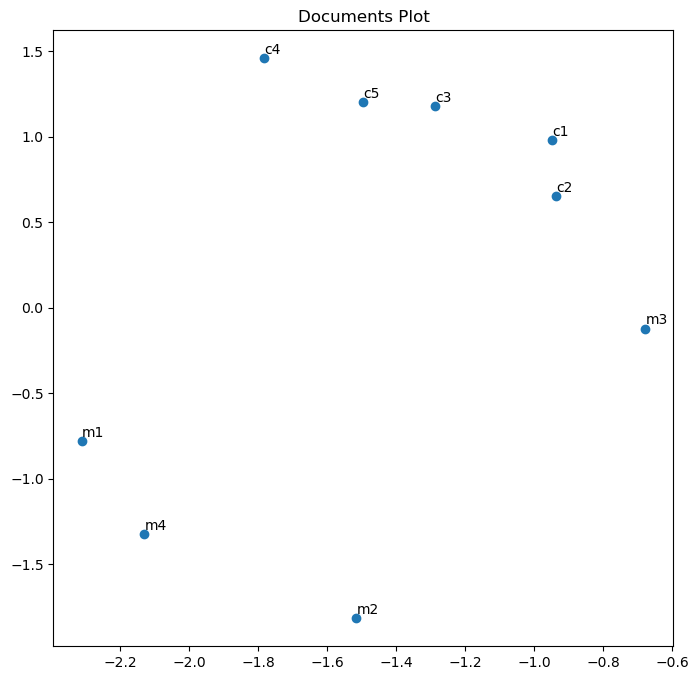

In [13]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

X = latent_docs[:, 0]
Y = latent_docs[:, 1]

fig,ax = plt.subplots(figsize=(8,8))
docName = createDocName(documents)
ax.scatter(X, Y)
ax.set_title('Documents Plot')

texts = [plt.text(X[i], Y[i], docName[i]) for i in range(len(docName))]
adjust_text(texts)

### Visualize terms in 2D space

In [14]:
#Visualize terms and print coordinates
latent_terms = np.dot(Uk, Sk)
latent_terms

array([[-0.5288969 , -0.33606505],
       [-0.7862911 , -0.90585858],
       [-0.95778872, -0.60667296],
       [-1.61179732, -1.65475107],
       [-0.5288969 , -0.33606505],
       [-1.43110318, -1.16641399],
       [-0.95778872, -0.60667296],
       [-0.74695242,  0.65107273],
       [-1.22892939,  0.45931522],
       [-0.58967885,  0.70287296],
       [-0.95778872, -0.60667296],
       [-1.3922137 ,  1.57762168],
       [-1.94325227,  0.50066913],
       [-1.89071562,  1.35276825],
       [-0.53186185, -0.24173347],
       [-0.96763621,  0.08642905]])

7

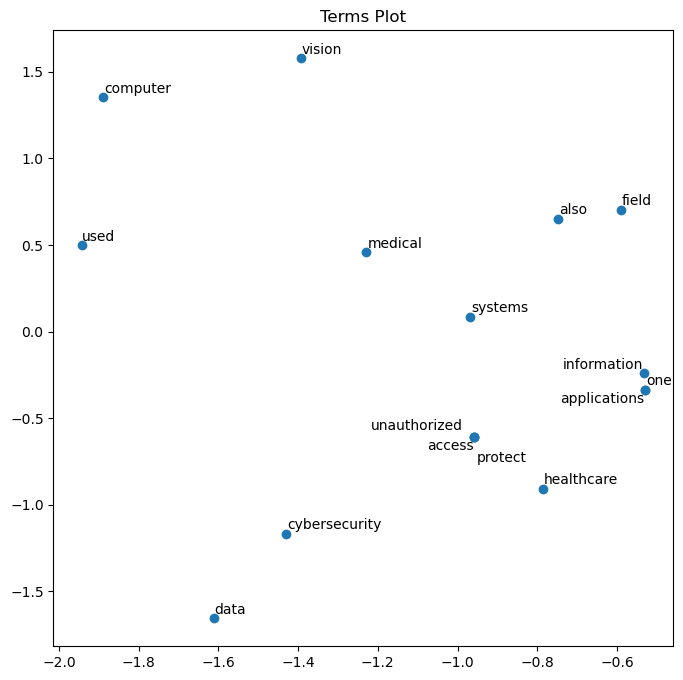

In [15]:
X = latent_terms[:, 0]
Y = latent_terms[:, 1]
terms = list(word_to_ix.keys())

fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(X, Y)
ax.set_title('Terms Plot')

texts = [plt.text(X[i], Y[i], terms[i]) for i in range(len(terms))]
adjust_text(texts)

##### Expected
Note: the order of rows could be different in your implementation as it is based on the indexing of the tokens done in build_word_to_ix
```CPP
[[-0.58967885  0.70287296]
 [-1.3922137   1.57762168]
 [-0.53186185 -0.24173347]
 [-1.89071562  1.35276825]
 [-0.5288969  -0.33606505]
 [-0.5288969  -0.33606505]
 [-0.74695242  0.65107273]
 [-1.94325227  0.50066913]
 [-1.22892939  0.45931522]
 [-0.96763621  0.08642905]
 [-1.61179732 -1.65475107]
 [-0.95778872 -0.60667296]
 [-0.95778872 -0.60667296]
 [-1.43110318 -1.16641399]
 [-0.95778872 -0.60667296]
 [-0.7862911  -0.90585858]]
```
![term.png](attachment:bdb847ce-c276-45a9-a7fe-a89787bbedfa.png)

## <CENTER>Task-3 (10 Points)

### Find matching documents for given document

In [16]:
# Hint create query vector for input document. Calculate its cosine distance from other documents
from numpy.linalg import norm

def query(s, Uk, Sk, Vk_t, word_to_ix, documents, min_score=0.9):
    '''
    Input:
        s:query document.
        Uk:Term matrix
        Sk:singular value matrix
        Vk_t:Document matrix
        word_to_ix: {word, index} map
        documents:list of document
        min_score:min score beyond which documents are considerd matching
    Output:
        q_hat: coordinates of query vector
        matches: list of tuples containing matching document and its score
    '''
    s = s.lower()
    s = removePunctuation(s)
    s = word_tokenize(s)
    queryVector = []
    matches = []
    for key in word_to_ix:
        count = 0
        for word in s:
            if key != word:
                continue
            else:
                count += 1
        queryVector.append(count)
    qhat = np.dot(queryVector, Uk)
    v1 = np.dot(Vk_t, Sk)
    listOfCosineDistances = []
    for i in range(len(v1)):
        cosine = np.dot(v1[i], qhat)/(norm(v1[i])*norm(qhat))
        listOfCosineDistances.append(cosine)
    indexes = [i for i in range(len(listOfCosineDistances)) if listOfCosineDistances[i] > min_score]
    for num in indexes:
        matches.append((documents[num], listOfCosineDistances[num]))
    return qhat, matches

In [17]:
q_hat, matches = query('E-commerce companies use cybersecurity to protect online transactions and prevent fraud.', Uk, Sk, Vk_t, word_to_ix, documents, 0.9)
print(q_hat)
if matches is not None:
    print(matches)
else:
    print("No matches found")

[-0.51519977 -0.51155458]
[('One of the most important applications of cybersecurity is in safeguarding sensitive data and personal information, such as financial data or healthcare records.', 0.9956454663736862), ('In the healthcare industry, cybersecurity is used to protect medical devices and prevent unauthorized access to patient data.', 0.974610647387395)]


##### Expected
```CPP
[-0.51519977 -0.51155458]
[('One of the most important applications of cybersecurity is in safeguarding sensitive data and personal information, such as financial data or healthcare records.', 0.9956454663736864), ('In the healthcare industry, cybersecurity is used to protect medical devices and prevent unauthorized access to patient data.', 0.9746106473873951)]
```

### Visual representation of query/document

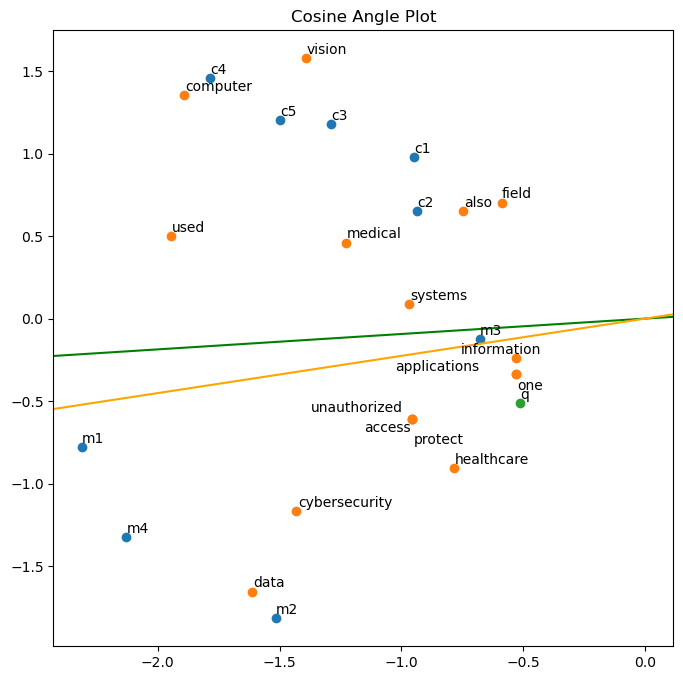

In [18]:
# Plot terms, documents and query documents along with lines representing its cosine angle
qv = ['q']
X = latent_docs[:, 0]
Y = latent_docs[:, 1]
X2 = latent_terms[:, 0]
Y2 = latent_terms[:, 1]
X3 = q_hat[0]
Y3 = q_hat[1]

fig,ax = plt.subplots(figsize=(8,8))
docName = createDocName(documents)
ax.scatter(X, Y)
ax.scatter(X2, Y2)
ax.scatter(X3, Y3)
ax.set_title('Cosine Angle Plot')
texts = [plt.text(X[i], Y[i], docName[i]) for i in range(len(docName))]
adjust_text(texts)
texts2 = [plt.text(X2[i], Y2[i], terms[i]) for i in range(len(terms))]
adjust_text(texts2)
texts3 = [plt.text(X3, Y3, qv[i]) for i in range(len(qv))]
adjust_text(texts3)

# calculate the inverse cosine of the cosine distance for the two documents and used that as the slope for the cosine angle line
sl = np.arccos(0.9956454663736866)
sl2 = np.arccos(0.9746106473873951)


plt.axline((0,0), slope=sl, color='green', label='axline')
plt.axline((0,0), slope=sl2, color='orange', label='axline')

##### Expected
![Cosine angle.png](attachment:6f3fc59f-73c5-48ff-930f-9d53a78a5dd5.png)

## **Theory questions: (5 points)**
- A) Give short description of Left-eigen vectors, right-eigen vectors and eigen-values matrix retured by Singular Value Decompostion of document-terms count matrix.


The left and right eigenvectors are mathematical objects used to represent documents. The right eigen vector, using rank k approximation (with k = 2) represents each of the 9 documents as a k vector. It gives us the coordinates of each of the documents in the concept space. The left eigen vector represents each of the 16 terms as mathematical objects in the same 2-dimensional space, weighted by the associated singular values. It gives us the coordinates of each of the words in the concept space. Eigenvalues are 2x2 matrix that represent the magnitude or importance of the associations within our data, which can give us a clue of how many dimensions we need to use to avoid letting in too much noise in our data.    

- B) Visually represent the document "Graph and tree generation" in 2D space along with words and documents as given in previous question.

6

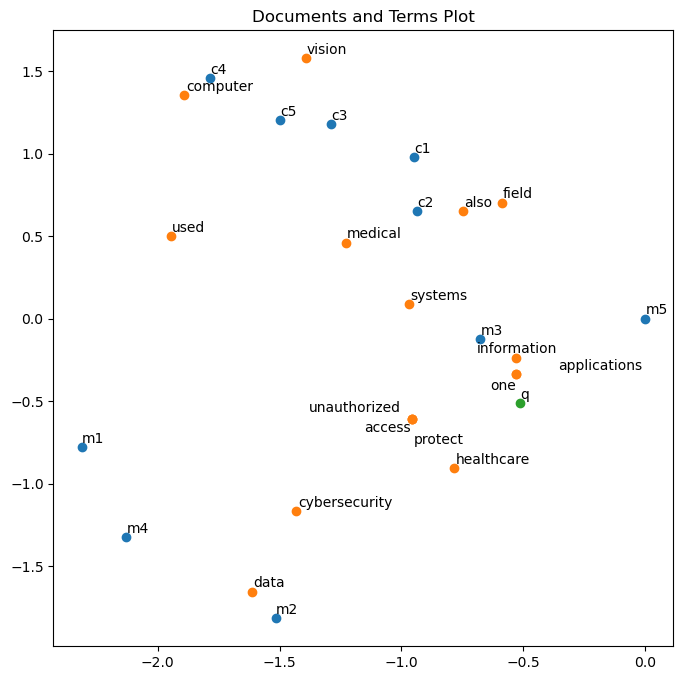

In [19]:
m5 = "Graph and tree generation"
documents.append(m5)
for sent in documents:
    preprocess(sent)
docName = createDocName(documents)
word_to_ix = build_word_to_ix(documents, stopwords)
X = build_td_matrix(documents, word_to_ix)
Uk, Sk, Vk_t = svd(documents, word_to_ix, 2)
latent_docs = np.dot(Vk_t, Sk)
latent_terms = np.dot(Uk, Sk)

qv = ['q']
X = latent_docs[:, 0]
Y = latent_docs[:, 1]
X2 = latent_terms[:, 0]
Y2 = latent_terms[:, 1]
X3 = q_hat[0]
Y3 = q_hat[1]

fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(X, Y)
ax.scatter(X2, Y2)
ax.scatter(X3, Y3)
ax.set_title('Documents and Terms Plot')
texts = [plt.text(X[i], Y[i], docName[i]) for i in range(len(docName))]
adjust_text(texts)
texts2 = [plt.text(X2[i], Y2[i], terms[i]) for i in range(len(terms))]
adjust_text(texts2)
texts3 = [plt.text(X3, Y3, qv[i]) for i in range(len(qv))]
adjust_text(texts3)

# Q2. n-Gram Language Models (35 points)

Your task is to train n-gram language models. [Ref SLP Chapter 3]

- Task 1: You will train unigram, bigram, and trigram models on given training files. Then you will score on given test files for unigram, bigram, and trigram. you will generate sentences from the trained model and compute perplexity.
- Task 2: You will create training data for n > 3. and Repeat the above task from training model.
<h6>Part-A = (55 Points) </h6>

In [20]:
'''
Your imports go here
You are encouraged to implement your own functions and not use from library.
'''
import sys
import collections
from collections import Counter
import numpy as np
import math

In [21]:
# constants to define pseudo-word tokens
# access via UNK, for instance
# for this assignemnt we will follow <s> tag for beginning of sentence and
# </s> for end of senetence as suggested in SLP Book. Check sample training files for reference.
UNK = "<UNK>"
SENT_BEGIN = "<s>"
SENT_END = "</s>"

We need to initialise global variables for model

In [22]:

"""Initializes Parameters:
  n_gram (int): the n-gram order.
  is_laplace_smoothing (bool): whether or not to use Laplace smoothing
  threshold: words with frequency  below threshold will be converted to token
"""
# Initializing different object attributes
n_gram = 2
is_laplace_smoothing = True
vocab = []

# vocab1 contains all the words, not just the unique words
vocab1 = []

n_gram_counts = {}
n_minus_1_gram_counts = {}
threshold = 1


### Implement training function (10 points)

In [23]:
def make_ngrams(tokens: list, n: int) -> list:
    """Creates n-grams for the given token sequence.
    Args:
    tokens (list): a list of tokens as strings
    n (int): the length of n-grams to create

    Returns:
    list: list of tuples of strings, each tuple being one of the individual n-grams
    """
    n_grams = []
    ## Your code here
    for i in range(len(tokens) - n + 1):
        n_grams.append(tuple(tokens[i:i+n]))
    return n_grams

In [24]:
def train(training_file_path):
    """Trains the language model on the given data. Input file that
    has tokens that are white-space separated, has one sentence per line, and
    that the sentences begin with <s> and end with </s>
    Parameters:
      training_file_path (str): the location of the training data to read

    Returns:
    N Gram Counts, Vocab, N Minus 1 Gram Counts
    """
    with open(training_file_path, 'r') as fh:
      content = fh.read().split() # Read and split data to get list of words
    
    # Get the count of each word
    wordCount = collections.Counter(content)
    
    # Replace the words with <UNK> if count is < threshold(=1)
    for key, value in list(wordCount.items()):
        if wordCount[key] < threshold:
            for i in range(len(content)):
                if content[i] == key:
                    content[i] = UNK
    # make use of make_n_grams function
    ngrams = make_ngrams(content, n_gram)
    for n in ngrams:
        if n not in n_gram_counts:
            n_gram_counts[n] = 1
        else:
            n_gram_counts[n] += 1
    # Get the training data vocabulary        
    for word in content:
        vocab1.append(word)
        if word not in vocab:
            vocab.append(word)
    # For n>1 grams compute n-1 gram counts to compute probability
    if n_gram > 1:
        n_minus_1_grams = make_ngrams(content, n_gram-1)
        for n in n_minus_1_grams:
            if n not in n_minus_1_gram_counts:
                n_minus_1_gram_counts[n] = 1
            else:
                n_minus_1_gram_counts[n] += 1
        
    return n_gram_counts, vocab, vocab1, n_minus_1_gram_counts

Output your Trained Data Parameters:

In [25]:
n_gram_counts, vocab, vocab1, n_minus_1_gram_counts = train("C:/Users/sgheb/Downloads/data-1/train_data/berp-training_bi.txt")
print(n_gram_counts)
print(vocab)
print(n_minus_1_gram_counts)

{('<s>', "let's"): 196, ("let's", 'start'): 170, ('start', 'over'): 403, ('over', '</s>'): 367, ('</s>', '<s>'): 6755, ('<s>', 'my'): 6, ('my', 'mother'): 2, ('mother', 'is'): 1, ('is', 'coming'): 1, ('coming', 'to'): 1, ('to', 'visit'): 2, ('visit', 'and'): 1, ('and', "i'd"): 5, ("i'd", 'like'): 495, ('like', 'to'): 953, ('to', 'take'): 12, ('take', 'her'): 1, ('her', 'to'): 1, ('to', 'dinner'): 12, ('dinner', '</s>'): 224, ('<s>', 'new'): 1, ('new', 'query'): 1, ('query', '</s>'): 2, ('<s>', 'now'): 7, ('now', "i'm"): 8, ("i'm", 'interested'): 35, ('interested', 'in'): 39, ('in', 'some'): 5, ('some', 'middle'): 5, ('middle', 'eastern'): 14, ('eastern', 'food'): 10, ('food', '</s>'): 670, ('<s>', 'oh'): 29, ('oh', 'i'): 11, ('i', 'have'): 91, ('have', 'to'): 17, ('to', 'breakfast'): 1, ('breakfast', '</s>'): 89, ('i', 'increase'): 1, ('increase', 'the'): 2, ('the', 'walking'): 3, ('walking', 'distance'): 47, ('distance', 'i'): 3, ('i', 'can'): 69, ('can', 'go'): 14, ('go', 'fifteen'):

### Scoring function (points 5):
Implement Score function that will take input sentence and output probability of given string representing a single sentence.

In [26]:
def score(sentence):
    """Calculates the probability score for a given string representing a single sentence.
    Parameters:
      sentence (str): a sentence with tokens separated by whitespace to calculate the score of
      
    Returns:
      float: the probability value of the given string for this model
    """
    # Split the input sentence and replace out of vocabulary tokens with <UNK>
    sentence = sentence.lower().split()
    sentIndex = 0
    for word in sentence:
        if word not in vocab:
            sentence[sentIndex] = UNK
        sentIndex += 1
    # Calculate probability for each word and multiply(or take log and sum) them to get the sentence probability
    #prob = []
    #sentence = make_ngrams(sentence, n_gram)
    index = 0
    probability = 0
    logprob = 0
    #update index : find first word that is not <s>
    for i in range(n_gram-1, len(sentence)):
        num = tuple(sentence[i-n_gram+1:i+1])
        dem = tuple(sentence[i-n_gram+1:i])
        x = 0
        y = 0
        if (is_laplace_smoothing):
            x = 1
            y = len(vocab)
        if num in n_gram_counts.keys():
            x = x + n_gram_counts[num]
        if n_gram != 1:
            if dem in n_minus_1_gram_counts.keys():
                y = y + n_minus_1_gram_counts[dem]
            else:
                y = y + len(vocab)
        else:
            y = len(vocab1)
        logprob += math.log(x) - math.log(y)
    probability = math.exp(logprob)
    return probability

In [27]:
with open("C:/Users/sgheb/Downloads/data-1/test_data/hw2-test_bi.txt", 'r') as fh:
    test_content = fh.read().split("\n")
num_sentences_1 = len(test_content)
ten_sentences_1 = test_content[:10]
print("# of test sentences: ", num_sentences_1)
probablities = []

# of test sentences:  100


In [28]:
# print probabilities/score of sentences in test content
for sentence in test_content:
    probablities.append(score(sentence))
probablities = np.array(probablities)
mean = np.mean(probablities)
std_dev = np.std(probablities)
print(probablities)
print(mean)
print(std_dev)

[1.44987340e-09 3.89169715e-08 4.68241238e-17 1.17790171e-14
 5.81642648e-20 1.23850254e-13 6.74573238e-13 3.10264762e-27
 2.01918413e-17 8.75154333e-08 1.11959759e-09 2.85578369e-11
 9.72698286e-15 1.00165960e-05 5.59714113e-12 5.13825653e-06
 1.78281605e-05 2.87186105e-06 1.93523493e-13 8.10157985e-22
 1.93000469e-35 1.86680530e-37 3.37554324e-20 3.74757253e-19
 3.76383832e-17 1.93749689e-10 3.50983451e-06 5.57878220e-10
 8.78330389e-22 1.19689131e-12 1.00948958e-09 4.23080966e-16
 1.97745775e-14 1.29244224e-11 4.24919098e-18 2.01869289e-16
 2.47045390e-08 1.21573912e-08 1.50019143e-14 1.35696248e-10
 7.46364051e-14 1.05571355e-12 4.87759715e-12 1.25196706e-17
 1.41537803e-16 1.49394766e-16 3.81995394e-11 2.05269002e-10
 5.69615673e-18 3.50974619e-20 2.04640312e-23 5.07981697e-15
 3.28874548e-06 1.12576622e-04 1.12576622e-04 3.96735591e-13
 9.76999313e-13 1.90763839e-06 1.11781005e-08 1.16380360e-14
 1.30120623e-03 3.53275295e-15 1.52806200e-16 2.45466324e-12
 5.36540454e-23 8.144196

### Sentence generation (10 points)
Generate sentence from the above trained model
- To generate next word from a set of probable n-grams and their probabilities check below tutorial:
https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

In [29]:
def generate_sentence():
    """Generates a single sentence from a trained language model using the Shannon technique.
      
    Returns:
      str: the generated sentence
    """
    # Start with <s> and randomly generate words until we encounter sentence end
    # Append sentence begin markers for n>2
    # Keep track of previous word for stop condition
    index = 0
    prev_word = '<s>'
    sentence = prev_word
    if n_gram > 1:
      while prev_word != "</s>":
        availableChoices = {}
        probabilitydict = {}
        # Construct the (n-1) gram so far
        if prev_word == "<s>":
            n_minus_1_gram = tuple([prev_word]) * (n_gram - 1)
            if n_gram > 2:
                for i in range(n_gram-2):
                    sentence = sentence + " " + n_minus_1_gram[i]
        else:
            n_minus_1_gram = intermediate_n_gram[index:len(intermediate_n_gram)]
        # Get the counts of all available choices based on n-1 gram
        for n in n_gram_counts.keys():
            if n_minus_1_gram[0:len(n_minus_1_gram)] == n[0:len(n)-1]:
                availableChoices[n[-1]] = n_gram_counts[n]
        # Convert the counts into probability for random.choice() function
        for key, value in availableChoices.items():
            probabilitydict[key] = (availableChoices[key] / sum(availableChoices.values()))
        randomChoice = np.random.choice(list(probabilitydict), p = list(probabilitydict.values()))
        while randomChoice == '<s>':
            randomChoice = np.random.choice(list(probabilitydict), p = list(probabilitydict.values()))
        prev_word = randomChoice
        sentence = sentence + " " + prev_word
        intermediate_n_gram = n_minus_1_gram + tuple([prev_word])
        index = 1
        # If <s> is generated, ignore and generate another word
    else:
      # In case of unigram model, n-1 gram is just the previous word and possible choice is whole vocabulary
      probabilitydict = {}
      while prev_word != "</s>":
        n_minus_1_gram = prev_word
        # Convert the counts into probability for random.choice() function
        for n in n_gram_counts:
            probabilitydict[n[0]] = n_gram_counts[n] / sum(n_gram_counts.values())
        randomChoice = np.random.choice(list(probabilitydict), p = list(probabilitydict.values()))
        while randomChoice == '<s>':
            randomChoice = np.random.choice(list(probabilitydict), p = list(probabilitydict.values()))
        prev_word = randomChoice
        sentence = sentence + " " + prev_word
        # If <s> is generated, ignore and generate another word
        
    # Append sentence end markers for n>2
    if n_gram > 2:
        end_tokens = [SENT_END] * n_gram
        for i in range(n_gram-2):
            sentence = sentence + " " + end_tokens[i]
    
    return sentence

In [30]:
def generate(n):
    """Generates n sentences from a trained language model using the Shannon technique.
    Parameters:
      n (int): the number of sentences to generate
      
    Returns:
      list: a list containing strings, one per generated sentence
    """
    # Generate sentences one by one and store
    sentences = []
    for i in range(n):
        sentence = generate_sentence()
        sentences.append(sentence)
    return sentences

In [31]:
sentences = generate(50)
print("Sentences:")
for sentence in sentences:
  print(sentence)

Sentences:
<s> are there any cost does thai food </s>
<s> i'd like to spend up to the restaurant </s>
<s> i'd like to eat on friday night and salad bar and i want to go to have any type of it is okay can i want thai restaurants close to have uh won thai food please </s>
<s> can you </s>
<s> i'm looking for dinner saturday or friday </s>
<s> start over </s>
<s> monday </s>
<s> tonight </s>
<s> sunday for a really like a cheap restaurant </s>
<s> i want to eat uh tell me information about juan's place quick for in traveling doesn't matter </s>
<s> about hong-fu open </s>
<s> dinner </s>
<s> i don't want to go to the list of indian food is no more about fat slice pizza fat apple's </s>
<s> no further </s>
<s> it doesn't matter </s>
<s> um should preferably less than fifteen minutes </s>
<s> not really nice business </s>
<s> make that serves only </s>
<s> i'd like to travel for lunch or italian </s>
<s> i'm looking for a chicken dinner today </s>
<s> not for dinner </s>
<s> on monday </s>


### Evaluate model perplexity (5 points)
Measures the perplexity for the test sequence with your trained model. 
you may assume that this sequence may consist of many sentences "glued together"

The perplexity of the given sequence is the inverse probability of the test set, normalized by the number of words.


In [32]:
# Since this sequence will cross many sentence boundaries, we need to include 
# the begin- and end-sentence markers <s> and </s> in the probability computation. 
# We also need to include the end-of-sentence marker </s> 
# but not the beginning-of-sentence marker <s>) in the total count of word tokens N

def perplexity(test_sequence):
    """.
    Parameters:
      test_sequence (string): a sequence of space-separated tokens to measure the perplexity of

    Returns:
      float: the perplexity of the given sequence
    """ 

    # Replace out of vocab words with <UNK>, already done in score function
    probability = score(test_sequence)
    test_sequence_list = [token if token in vocab else UNK for token in test_sequence.split()]
    deleted_begin_markers = [word for word in test_sequence_list if word != "<s>"]
    N = len(deleted_begin_markers)
    inverse_probability = 1/probability
    perplexity = inverse_probability ** (1/N)


    # Remove sentence begin markers from data for computing N
    # Get the probability for the sequence
    
    return perplexity

In [33]:
print(perplexity(" ".join(sentences[0:10])))

57.45872914766699


### **Explore and explain: (5 points)**
* Experiment n_gram model for n = [1,2,3..7] of your choice. Explain the best choice of n that generates more meaninful sentences.

After experimenting with n_gram models between 1 and 7, I found that using n = 2 gave the best results with most meaningful sentences. This is because it gave me the lowest perplexity result out of all the models, at approximately 57. The n=1 model gave me a comparatively very high perplexity that exceeded 200 (which could clearly be seen in the sentences generated as they didn't make the most sense) while n = 3 and higher gave slightly higher perplexities at around between 110-130. The lower perplexity is an important measurement because it tells us that the language model is a better predictor of the words in the test set as the test set probability is maximized.   

# Q3. Classification using LSTM - using Tensorflow (30 Points)
In this part, we will be building a bidirectional LSTM network to train and inference sentiment analysis on IMDB dataset.<br>

If you need a refresher or have never worked with Neural Networks before, here are a few resources:
- https://web.stanford.edu/~jurafsky/slp3/7.pdf
- https://web.stanford.edu/~jurafsky/slp3/9.pdf
- https://colah.github.io/posts/2015-08-Understanding-LSTMs/


Training a neural network model will take time. 
- You can use Google Colab / Kaggle notebooks. You get a free GPU for a limited time to tweak your hyperparameters.
- Without a GPU, You might have to wait longer to experiment.

### Library Imports

In [34]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

### Visualizing data distribution (1 Point)


In [35]:
## Reading the data and removing columns that are not important. 
dataset = pd.read_csv("movie_reviews-2.csv", sep = ',', encoding = 'latin-1', usecols = lambda col: col not in ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

In [36]:
 #######################################################   
 # print head of data frame with help of head function # 
 #######################################################
dataset.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,"Petter Mattei's ""Love in the Time of Money"" is...",positive
4,"Probably my all-time favorite movie, a story o...",positive


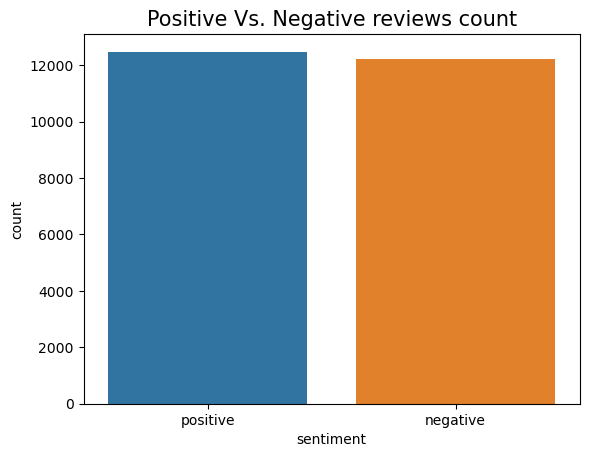

In [37]:
 ####################################################### 
 # plot Positive Vs. Negative reviews count            # 
 #######################################################

sns.countplot(x = 'sentiment', data=dataset)

plt.title("Positive Vs. Negative reviews count", fontsize = 15)
plt.show()



### Cleaning the Reviews (2 Points)

In [38]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())

# From the first assignment
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sgheb\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sgheb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sgheb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\sgheb\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [39]:
 #############################################################################################  
 # Clean all the reviews in the dataset using the clean_text function provided above         # 
 ############################################################################################# 
dataset['review'] = dataset['review'].apply(lambda x: clean_text(x))


In [40]:
 #####################################################################
 # print head of the "CLEANED" data frame with help of head function # 
 #####################################################################
dataset.head(5)

,review,sentiment
0,one reviewer mentioned watching 1 oz episode y...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,petter matteis love time money visually stunni...,positive
4,probably alltime favorite movie story selfless...,positive


### Splitting the dataset and Encoding Labels (2 Points)

Spliting data: <br> 
80% for the training and the remaining 20% for validation.

Encoding Labels: <br>
Encode labels as negative and positive as 0 and 1 respectively


In [41]:
#################################################################################
# Split the data using the sklearn module                                       #
# 80% for the training and the remaining 20% for validation                     #
#################################################################################
X = dataset['review']
y = dataset['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
#################################################################################
# Initialize label encoder from sklearn module                                  #
# fit on train labels and transform both train and validation labels            #
#################################################################################
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

### Pre-Processing The Text (5 Points)
 

In [43]:
# You can use the modules given below
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

###############################################################################  
# Fit your tokenizer on the training reviews                                  #
###############################################################################
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

#################################################################################################
# The word_index dictionary assigns a unique index to each unique word present in the training  #
# reviews.                                                                                      #
#                                                                                               #
# Create the word_index dictionary using the tokenizer                                          #
# Find the vocabulary of your training reviews                                                  #
#################################################################################################

word_index = tokenizer.word_index

vocabulary = [word for word in word_index]


#################################################################################################
# Convert the reviews in the dataset to their index form by using a function available          #
# with the tokenizer                                                                            #
# HINT : convert training and validation reviews into sequences                                 #
#################################################################################################
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)


#################################################################################################
# Pad the the training and validation sequences so all of them have the same length             # 
# set maxlen = 200                                                                              #
#################################################################################################

# maxlen which is the maximum length of one review we will use for our training
train_sequences_padded = pad_sequences(train_sequences, maxlen = 200)
test_sequences_padded = pad_sequences(test_sequences, maxlen = 200)

print('Vocabulary : {}'.format(vocabulary))

Vocabulary : ['br', 'movie', 'film', 'one', 'like', 'time', 'good', 'character', 'get', 'story', 'even', 'would', 'make', 'see', 'really', 'scene', 'well', 'much', 'people', 'great', 'also', 'bad', 'first', 'dont', 'show', 'way', 'thing', 'made', 'could', 'think', 'life', 'go', 'know', 'watch', 'many', 'love', 'never', 'two', 'seen', 'actor', 'plot', 'say', 'acting', 'little', 'best', 'look', 'year', 'end', 'ever', 'take', 'come', 'man', 'better', 'still', 'work', 'part', 'find', 'something', 'give', 'want', 'lot', 'im', 'director', 'back', 'real', 'watching', 'guy', 'performance', 'woman', 'doesnt', 'though', 'play', 'didnt', 'another', 'actually', 'nothing', 'funny', 'new', 'every', 'going', 'role', 'old', 'u', 'thats', 'point', 'cant', 'feel', 'day', 'quite', 'pretty', 'girl', 'cast', 'world', 'fact', 'young', 'seems', 'thought', 'minute', 'got', 'horror', 'comedy', 'however', 'big', 'enough', 'around', 'right', 'may', 'action', 'without', 'long', 'always', 'ive', 'star', 'must', 'f

### Using glove vectors for embedding (5 Points)

GloVe vectors capture both global statistics and local statistics of a corpus. We use GloVe to convert words to embeddings in the vector space based on their semantics. 

We will be using the 200-dimensional GloVe vectors for the task at hand.

To learn more about GloVe please read the following resource:
- https://nlp.stanford.edu/pubs/glove.pdf

In [44]:
glove_dictionary = {}
with open('glove.6B.200d.txt', 'r', encoding="utf-8") as file:
    for each_line in file:
        words_in_line, coeff_cients = each_line.split(maxsplit=1)
        coeff_cients = np.array(coeff_cients.split(),dtype = float)
        glove_dictionary[words_in_line] = coeff_cients

In [45]:
 # All the words which are not in the GloVe dictionary will be assigned a zero vector.

embedding_matrix = np.zeros((len(vocabulary) + 1, 200))

######################################################################
# The glove_dictionary contains words vs their respective embeddings #
#                                                                    #
# Create the embedding matrix using the glove_dictionary             #
######################################################################
for word, index in word_index.items():
    embed_vector = glove_dictionary.get(word)
    if embed_vector is not None:
        embedding_matrix[index] = embed_vector

In [46]:
embedding_matrix.shape

(99735, 200)

Sample output : (99987, 200)

### Creating The Model (10)

If you need a refresher or have never worked with Neural Networks before, here are a few resources:
- https://web.stanford.edu/~jurafsky/slp3/7.pdf
- https://web.stanford.edu/~jurafsky/slp3/9.pdf
- https://colah.github.io/posts/2015-08-Understanding-LSTMs/


Training a neural network model will take time. 
- You can use Google Colab / Kaggle notebooks. You get a free GPU for a limited time.
- Without a GPU, You might have to wait longer to experiment.


Useful resources : <br>
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential <br>
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense <br>
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout <br>





In [47]:
import tensorflow as tf

tf.random.set_seed(42)

######################################################
# Complete this linear model in tensorflow           #
######################################################

def build_model(embedding_matrix):

  ''' 
  Arguments:
    embedding_matrix : a matrix with the corresponding embeddings
    of all words.

  Returns:
    The LSTM model that you created.
  '''
  
  model = tf.keras.Sequential()
  # TO DO: layer 1 : add embedding layer
  model.add(tf.keras.layers.Embedding(input_dim = len(vocabulary) + 1, output_dim = 200, weights=[embedding_matrix], input_length = 200, trainable=False))
  # The embedding layer maps the words to their embedding vectors from the embedding matrix

  # TO DO: layer 2 : add Bidirectional LSTM Layer 
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10)))

  # TO DO Add more layers : you can add more dense layers and dropout
  # NOTE : You should be able to achieve an validation accuracy greater than 85%
  #        within 10 epochs
  model.add(tf.keras.layers.Dense(32, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))

  # TO DO Final layer : add output layer and activation 
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  model.summary()
  # TO DO : use a loss function, optimizer as adam to compile 
  # and evaluate model on auc,precision,recall,accuracy
  # HINT : choose your loss function based on the task (binary classification)
  model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['AUC', 'Precision', 'Recall', 'Accuracy'])
    
  return model

In [48]:
# NOTE : You should be able to achieve an validation accuracy greater than 85%
#        within 10 epochs

#################################################################
# Call the build_model function and initialize the model        #
#################################################################
model = build_model(embedding_matrix)

#######################################################################################################
# train and validate the model on the padded sequences of text which we have created initially        #
#######################################################################################################
model.fit(train_sequences_padded, y_train, epochs=10, batch_size = 16, validation_data=(test_sequences_padded, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 200)          19947000  
                                                                 
 bidirectional (Bidirectiona  (None, 20)               16880     
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                672       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19,964,585
Trainable params: 17,585
Non-trainable params: 19,947,000
_______________________________________

### Plotting Accuracy and Losses (5 Points)
 




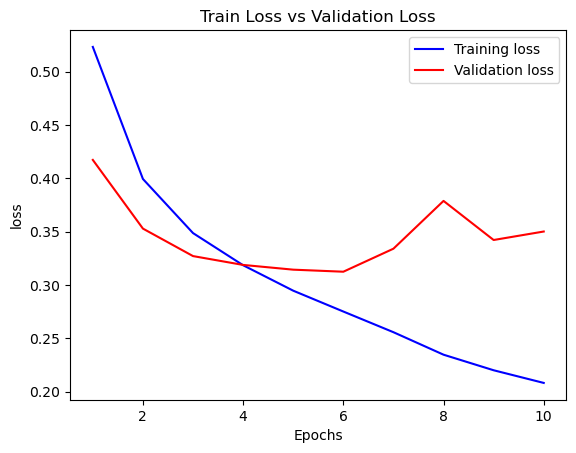

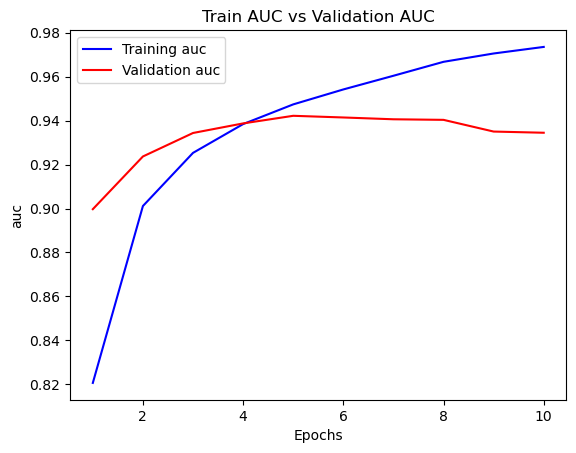

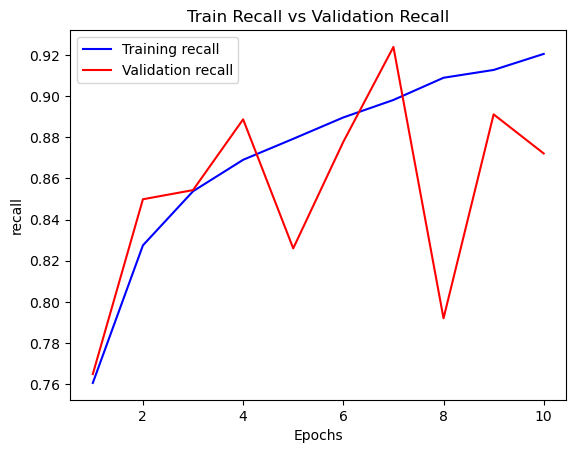

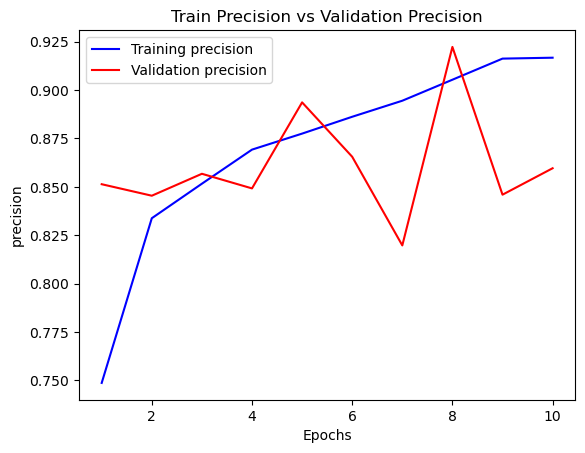

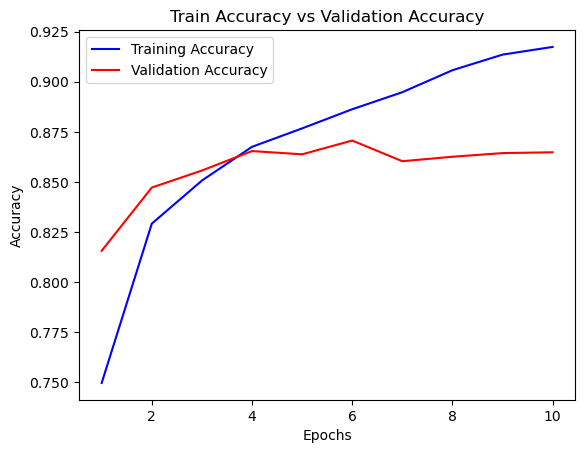

In [49]:
####################################
# PLOT :                           #
# train loss vs val loss           #
# train auc vs val auc             #
# train recall vs val recall       #
# train precision vs val precision #
# train accuracy vs val accuracy   #
####################################

def createPlot(train_metric, val_metric, title):
    history_dict = model.history.history
    train_values = history_dict[train_metric]
    val_values = history_dict[val_metric]
    epochs = range(1, len(train_values) + 1)
    plt.plot(epochs, train_values, 'b', label='Training ' + train_metric)
    plt.plot(epochs, val_values, 'r', label='Validation ' + train_metric)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(train_metric)
    plt.legend()
    plt.show()
    
createPlot('loss', 'val_loss', 'Train Loss vs Validation Loss')
createPlot('auc', 'val_auc', 'Train AUC vs Validation AUC')
createPlot('recall', 'val_recall', 'Train Recall vs Validation Recall')
createPlot('precision', 'val_precision', 'Train Precision vs Validation Precision')
createPlot('Accuracy', 'val_Accuracy', 'Train Accuracy vs Validation Accuracy')

In [50]:
# You will need to include the pickled model along with the other submission files
# The saved model will be used to verify your lstm's predictions on hidden reviews

##################################################################################
# Save your trained model as a pickle file named "lstm_classifier"               #
# You will be using this saved model to make predictions in the next module      #
##################################################################################

import pickle 
pickle.dump(model, open('lstm_classifier.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\bidirectional
......vars
...layers\bidirectional\backward_layer
......vars
...layers\bidirectional\backward_layer\cell
......vars
.........0
.........1
.........2
...layers\bidirectional\forward_layer
......vars
...layers\bidirectional\forward_layer\cell
......vars
.........0
.........1
.........2
...layers\bidirectional\layer
......vars
...layers\bidirectional\layer\cell
......vars
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\embedding
......vars
.........0
...metrics\auc
......vars
.........0
.........1
.........2
.........3
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...metrics\precision
......vars
.........0
.........1
...metrics\recall
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........

### Prediction (5 Points)

In [51]:
######################################################################
# Load your saved model                                              #
# Use the saved model to make predictions                            #
######################################################################

saved_model = pickle.load(open('lstm_classifier.pkl', 'rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-12 21:47:50         2946
metadata.json                                  2023-03-12 21:47:50           64
variables.h5                                   2023-03-12 21:47:52     80054792
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\bidirectional
......vars
...layers\bidirectional\backward_layer
......vars
...layers\bidirectional\backward_layer\cell
......vars
.........0
.........1
.........2
...layers\bidirectional\forward_layer
......vars
...layers\bidirectional\forward_layer\cell
......vars
.........0
.........1
.........2
...layers\bidirectional\layer
......vars
...layers\bidirectional\layer\cell
......vars
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\embedding
......vars
.........0
...metrics\auc
...

In [52]:
# use the saved model to predict the reviews
def predict_review(review):
  '''
  Arguments:
    review : A single review for which you want to predict the sentiment for.
             example: "This movie was amazing! I would defenitely watch it again."

  Returns:
    The predicted sentiment for the review : either 1 or 0
  '''

 ############################################################################# 
 # Predict the sentiment for the given review using the model                #
 # that you trained and return the sentiment                                 #
 #                                                                           #
 # HINT : Remember that the review needs to be "preprocessed" before you use #
 # it for prediction                                                         #
 #############################################################################

  review = clean_text(review)
  review = tokenizer.texts_to_sequences([review])
  review = pad_sequences(review, maxlen = 200)
  prediction = saved_model.predict(review)
  if prediction > 0.5:
    prediction = 1
  else:
    prediction = 0
  return prediction

In [53]:
# Do not edit this cell

for review in ["If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!",
                "What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative direction, too. Some VERY faint echoes of Fargo here, but it just doesn't come off.",
                "I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the romance between Joe and Jean keeps me on the edge of my seat, plus I still think Bryan Brown is the tops. Brilliant Film.",
                "Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement value. About as unentertaining, uninstructive and just plain dull as a film can be."]:
    p = predict_review(review)
    print(f'{review[:100]} -> {p}')
    

1/1 [==============================] - 1s 1s/step
If you like original gut wrenching laughter you will like this movie. If you are young or old then y -> 1
1/1 [==============================] - 0s 52ms/step
What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative  -> 0
1/1 [==============================] - 0s 41ms/step
I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the -> 1
1/1 [==============================] - 0s 44ms/step
Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement val -> 0


### Expected Output:

If you like original gut wrenching laughter you will like this movie. If you are young or old then y -> 1 <br>
What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative  -> 0 <br>
I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the -> 1 <br>
Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement val -> 0